<h1><center>COMP1008: Exercise 3 - Linear Regression with sklearn</center></h1>

Linear regression is a common supervised learning algorithm for regression tasks. This algorithm learns to model the (linear) correlations between the input variables and the output variable in a given dataset. `scikit-learn` is a powerful machine learning library in Python that provides a user-friendly and effective approach to implement linear regression with just a few lines of code.

<div class="alert alert-success">
    <h3>Mini-Challenge 2: Linear Regression and Visualisation</h3>
</div>

Upon completing the guided tutorial on linear regression, you are challenged in Part 3 to build a linear regression model using `scikit-learn` to predict the heights of people based on their weight with a set of real-world data `data-weight-height.csv`.

## 1. Recap: linear regression in machine learning

<b>Supervised learning</b> is one type of machine learning tasks that learne a function that maps the input (i.e. features) to an expected output (i.e. label) with given data (i.e. samples of input-output pairs). COMP1008 covers two main types of supervised learning:
- <b>Regression</b>: the output/label is continuous,
- <b>Classification</b>: the output/label is discrete/categorical.

<img align="right" width=280 src="img-lr.png"><br>

<b>Linear regression</b> is fast to train and easy to use, requiring little parameter tuning. It is also easy to interpret compared to other models such as artificial neural networks. Training a linear regression model involves learning the coefficients (<b><i>intercept</i> $b_0$</b> and <b><i>coefficient</i> $b_i$</b>) of the following function that maps the <b><i>input x (features)</i></b> to <b><i>output y (label)</i></b> in the training data.
- For a single variable, the function is <b><i>y</i></b> = $b_0$ + $b_1$ * <b><i>x</i></b> (see the figure to the right)<br>
- For multiple variables, the function is <b><i>y</i></b> = $b_0$ + $b_1$ * <b><i>x<sub>1</sub></i></b> + $b_2$ * <b><i>x<sub>2</sub></i></b> + ...

The most common linear regression involves finding the best-fit straight line that minimises the mean squared errors (MSE), i.e. difference between the given data points and the corresponding points on the regression line.

<a id='s1_tutorial'></a>
## 2. Tutorial: Linear regression with sklearn for Sales Prediction

We usually use the following steps in building machine learning models:
1. Data pre-processing.
2. Splitting data into two disjoint sets of `training` data and `testing` data.
3. Building the model and training it using the `training` data.
4. Validating the model by evaluating its performance using the `testing` data.
5. Improve the model by analysing its performance. If needed go back to step 1 or 2.

In [ ]:
# import Python's standard libraries
import pandas as pd # data preparation
import numpy as np # data operation
import matplotlib.pyplot as plt # data visualisation


: 

In this below example of predicting the sales, `Sales` would be our output, and input features (in thousands dollars) are the advertising spent on `TV`, `Radio` and `Newspaper`.

In [2]:
# 1) Reading the data from CSV file  
adv_df = pd.read_csv("data-Advertising.csv")

# 2) Print the Head of the data for basic information 
adv_df.head() 


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Alternatively to the 'Head' with the dataframe, you should also try to use the following functions and see  
a)  ` print(adv_df) `  b)  ` info() `    c)  ` describe() `

What are the differences you observe between all of them, and the head()?!   

In [3]:
# Using print: What do you see?! 
print( adv_df )

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [4]:
# Using info() - What additional information you have?! 
adv_df.info()  

# Tips: Look at the number of enries (in the RangeIndex)  and for every column: look at the number of Non-Null Count (should it be the same?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Using describe -  What do you think is it about? 
adv_df.describe()  

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Plotting the data 
It is always a good practice to also plot the the data to visualize its distribution and core information.  
Here, we are using ` matplotlib ` scatter plot  

Text(0, 0.5, 'Sales')

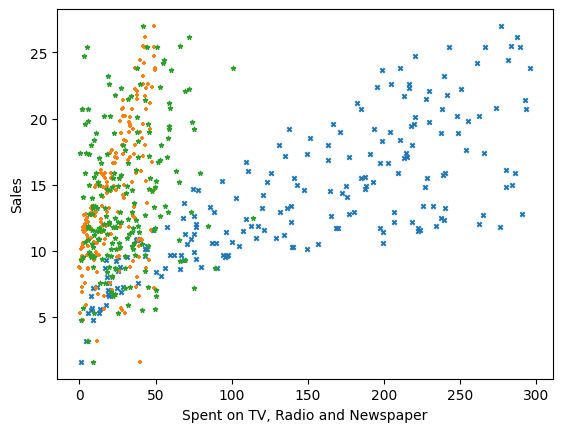

In [6]:
# Using 'matplotlib' scatter plot  

# For plotting, please pay attention on the core information x and y, for instance: 
# ---------------------------
# Print what is in the x-axis:  adv_df['TV']  and y-axis:  adv_df['Sales']    --> Notice they have to be the same dimension. 
# Try yourself to print them:   
# print(adv_df['TV'])
# print(adv_df['Sales'])
# ---------------------------
plt.scatter(x = adv_df['TV'], y = adv_df['Sales'], s=10, marker='x')
plt.scatter(x = adv_df['Radio'], y = adv_df['Sales'], s=10, marker='+')
plt.scatter(x = adv_df['Newspaper'], y = adv_df['Sales'], s=10, marker='*')
# ---------------------------
# Please take a look at the marker option and scale size.  What happens if you change the size of s?  Want to try?  
# Have you tried changing it?! 
# ---------------------------

plt.xlabel('Spent on TV, Radio and Newspaper')
plt.ylabel('Sales')




---

### Step 1. Getting the data ready for machine learning

Data preprocessing is improtant to construct successful machine learning models. This includes removing missing values and  outliers. We've looked at this in the previous tutorial and exercise. Good news is there is no missing value in this dataset, shown as below. 
Check-out the ` isnull() `  function.

In [7]:
# Returns the number of null values per column inofrmation
adv_df.isnull().sum()

# If you want to understand better the function, take a look on individual parts of it: 
#
# Uncomment the line below and see the output. 
print(adv_df.isnull()) 
#
# Notice that false and true can be dealt as a binary 0 and 1. Then if you sum-up 1s, you have the number nulls.   


        TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]


Looking back at the ` describe() ` function, you can see a summary of information for the dataframe. 

From the below we can see that values of data range between 0, and 296.4. 

In linear regression, **it's important to scale the data into the same range**; otherwise it'll be difficult to tell the importance of the features in the trained models. See more details of analysis on the learned coefficients in Step 3.

In [11]:
# Copying the data again from the CSV to Panda:
adv_df = pd.read_csv("data-Advertising.csv") 

# Checking the describe:  
adv_df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Pre-processing 

Using the sklearn ( scikit-learn ) makes much easier to work on the regression. 

In [16]:
from sklearn import preprocessing

# Create an scaler object
min_max_scaler = preprocessing.MinMaxScaler() 



# Pre-processing (scaling) directly from Pandas: 
#------------------------------
# Fit and transform the DataFrame (preserving column names)
#adv_df_scaled = adv_df.copy()  # Copy the original DataFrame
#adv_df_scaled[adv_df.columns] = min_max_scaler.fit_transform(adv_df)

# Alternatively, you can also reassign the DataFrame directly:
# adv_df_scaled = pd.DataFrame(scaler.fit_transform(adv_df), columns=adv_df.columns)
#
# Notice that min_max_scaler.fit_transform(adv_df) returns a numpy.ndarray while adv_df_scaled[adv_df.columns] is Panda type.  
# Panda will convert the output of the ndarray fitting it to the correct structure.  
#------------------------------



# Pre-processing (scaling) transforming it to numpy arrays: 
#------------------------------
# # Alternatively, you can also create numpy array to make the transformation (this should be fairly quicker for large datasets)
# # Creates a temporary numpy array

### More efficient method for scaling large datasets within values -> could be good for the stockNN system??

x = adv_df.values # returns a numpy array
x_scaled = min_max_scaler.fit_transform(x) # normalise using the scaler ### fit_transform finds the values to be normalised between and then applies the normalisation, transform just applies the normalisation for the values that have already been found
adv_df_scaled = pd.DataFrame(x_scaled) # store back as a pandas Dataframe (creating a new one)
display(adv_df_scaled.head())   # --> Notice the head now is numeric. 
adv_df_scaled.rename(columns={0: 'TV', 1: 'Radio', 2: 'Newspaper', 3: 'Sales'}, inplace=True)
display( adv_df_scaled.head() ) # --> See the difference 


adv_df_scaled.head()



,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


Now let's get the input and output data ready.

# Input and Output 

Here we divide the dataset into input and output. 
- Output (end-effect):  **Sales** 
- Input  (generators):  **TV** - **Radio** - **Newspaper**  (advertising) 


In [17]:
adv_df_output = adv_df_scaled['Sales']

In [18]:
adv_df_input = adv_df_scaled.drop(columns=['Sales'])
adv_df_input.head()

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


---

### Step 2: split training and testing sets
<img align="right" width=300, src="train-and-test-datasets.png" style="padding-left:1rem;">

`sklearn` provides a module called `train_test_split` to randomly split data into training and test sets thus to minimise the potential bias brought by manually partitioning the data.
- The <b>training set</b> is used for building and tuning the model
- The <b>test set</b> should not be used in training, but used as unseen new data to evaluate the actual performance of the trained model

In [19]:
# import the scikit-learn module "model_selection" 
from sklearn.model_selection import train_test_split

# prepare the training and testing datasets by a ratio of 70:30, with parameter `test_size`
x_train, x_test, y_train, y_test = train_test_split(adv_df_input, adv_df_output, test_size = 0.3, random_state=1)

---

### Step 3: model training with the training data
The `fit()` method in the imported `LinearRegression` module trains the model with our <b>training data</b> as arguments.

In [20]:
# import the scikit-learn module "linear_model" to build / train / fit the model
from sklearn.linear_model import LinearRegression

# instantiate the linear regression algorithm
lr = LinearRegression() 

# the `fit` method trains the algorithm with the training data prepared in Step 2
lr.fit(x_train, y_train) #Automatically sets the number of inputs to the number of columns in the dataframe > for this case its 3 -> (spending on:) Tv Radio Newspaper

### command 'fit' fits the model to the training data using a linear function
### essentially an advanced way of finding the most accurate line of best fit through each data point in the data set
### to get more advanced lines -> ie quadratic equations a deep neural network is needed 

LinearRegression()

## Interpreting the Linear Regression
<img align="right" width=230, src="img-mse.png">
<img align="right" width=230 src="img-lr.png">

The linear regression training algorithm `fit` learns the optimal intercept and slope (coefficients) in a regression line that best fits the training data.

## What does the coefficients mean?!
We can print these learned values as below, and interpret the trained model as follows: around 0.55 and 0.34 dollar advertising on TV and Radio is associated with an increase of approximately 1 dollar in Sales. Avertising on Newspaper contribute almost nothing to the Sales. By comparing the coefficents of the three input features, we can conclude that avertising on TV is more important than that of Radio.

In [21]:
print('\n')
print(adv_df_input.columns)
print('Coefficient/slope:',lr.coef_) 
### .coef_ shows the weights that each input is multiplied by to get the equation of the line
### as we have 3 inputs the equation of the line is in the form :
###     y = Ax+By+Cz+D, where A,B and C are the inputs TV spending, Radio spending and newspaper spending, and D is some arbitrary value
###     so .coefs_ represents x,y,z ie the weight that each element in the input has on the line

print('Intercept:',lr.intercept_)

print('\n')
# Or better displayed
print('--> Zero-Advertise - Sales output: ', lr.intercept_)    # This is a constant value!  
print('--> Linear influence from TV-ads -- That is, sales = TVadsmult * adsUSD  ---  TVadsmult: ', lr.coef_[0])  
print('--> Linear influence from Radio  -- That is, sales = Radiomult * adsUSD  ---  Radiomult: ', lr.coef_[1])  
print('--> Linear influence from Newsp  -- That is, sales = NewsPmult * adsUSD  ---  NewsPmult: ', lr.coef_[2])  




Index(['TV', 'Radio', 'Newspaper'], dtype='object')
Coefficient/slope: [0.54660317 0.3448302  0.00828646]
Intercept: 0.053962106855284575


--> Zero-Advertise - Sales output:  0.053962106855284575
--> Linear influence from TV-ads -- That is, sales = TVadsmult * adsUSD  ---  TVadsmult:  0.5466031702811378
--> Linear influence from Radio  -- That is, sales = Radiomult * adsUSD  ---  Radiomult:  0.344830204303205
--> Linear influence from Newsp  -- That is, sales = NewsPmult * adsUSD  ---  NewsPmult:  0.008286461903860056


### Discussion: 
In practice, the company should stop advertising on Newspapers. In building the linear regression model, we should remove this input feature, as it's not useful and incurr unnessary computing cost in the training. Without the scaling in Step 1, it would be difficult to compare them! 

In [22]:
print('\n')
print('The linear regression function learned between x an y is:  \n\n y =', lr.intercept_, '+', lr.coef_[0], '* TV', 
      '+', lr.coef_[1], '* Radio', '+', lr.coef_[2], '* Newspaper')



The linear regression function learned between x an y is:  

 y = 0.053962106855284575 + 0.5466031702811378 * TV + 0.344830204303205 * Radio + 0.008286461903860056 * Newspaper


---

### Step 4: Test / evaluation on testing data

The `metrics` module in `sklearn` provides method to calculate the `mean_squared_error` MSE between the predictions and the true labels.

We need to know how far off is our regression (approximation).

In [23]:
# import the scikin-learn module "metrics" to evaluate the trained model on the test dataset
from sklearn import metrics

# Predict using the linear model on the testing data (input) prepared in Step 1
y_pred = lr.predict(x_test)

# Calculate the model performance, i.e. predicted output vs. actual output of test data prepared in Step 1
print('\n Mean Square Error (MSE): ',metrics.mean_squared_error(y_test, y_pred))


 Mean Square Error (MSE):  0.002989839586252364


Is this a "good" (low enough) MSE value?<br>
It's hard to say, as it depends on the domain (range of `Sales` values). MSE is most useful to compare different models.

Text(0, 0.5, 'Sales')

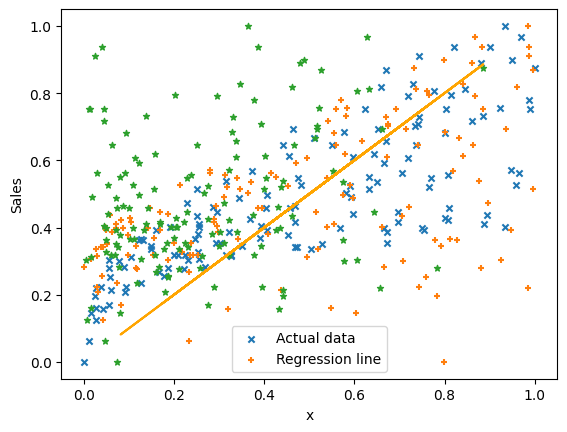

In [24]:
# visualise the line that best fits the example dataset.

# Plotting the datapoints 
#-------------------------------
plt.scatter(x_train['TV'], y_train, marker="x",s=20) # training data points
plt.scatter(x_train['Radio'], y_train, marker="+",s=20)
plt.scatter(x_train['Newspaper'], y_train, marker="*",s=20)

# Plotting the regression line 
#-------------------------------
plt.plot(lr.coef_[2] * x_test['Newspaper'] + lr.coef_[1] * x_test['Radio'] + lr.coef_[0] * x_test['TV'] + lr.intercept_,
    y_pred, color='orange') # linear regression model

# Legend information
#-------------------------------
plt.legend(['Actual data','Regression line'])
plt.xlabel('x')
plt.ylabel('Sales')

<img align="right" width=400, src="img-kfolds.png">

<b>K-fold cross-validation</b> is a resampling method to evaluate machine learning models. It partitions the dataset into <i>k</i> parts for <i>k</i> runs of training. In each of the <i>k</i> runs, (<i>k</i>-1) partitions are used to train the model, and the remaining one partition is used to test the trained model.

The overall average performance of the <i>k</i> testings, instead of just a single train/test split, provides more accurate evaluation on the trained model, and thus a better indication of the model's performance on new unseen data.

The `cross_val_score` method in `sklearn` trains and tests a model over multiple folds of the data in a "pipeline". There is no need to manually partition the data. We just need to define <i>k</i> by parameter `cv`, send the whole input data X and outoput y to `cross_val_score`, and provide the metric by parameter `scoring`. 

Note: *In the sklearn `cross_val_score` method, the score is calculated as a negative value. We can simply negate the score to obtain the MSE.*

In [25]:
from sklearn.model_selection import cross_val_score

lr1 = LinearRegression()

# conduct and calculate k MSE scores for the k cross validations
cross_val_score(lr1, adv_df_input, adv_df_output, cv=5, scoring='neg_mean_squared_error')

array([-0.00486165, -0.00375979, -0.0024571 , -0.00841056, -0.00432628])

In [26]:
# calculate the mean of the k runs
cross_val_score(lr1, adv_df_input, adv_df_output, cv=5, scoring='neg_mean_squared_error').mean()*-1

np.float64(0.004763076751658828)

---

### Step 5: improve the model based on analysis

Linear regression is usually reliable, with little parameter to tune. There is usually less scope to improve the model by tuning the parameter. However, we can see that the scores from each of the <i>k</i> runs could be quite different, meaning the performance depends very much on how the data is partitioned. How would you resolve this issue?

---

## 3. Mini-Challenge 2: weight-height project

<div class="alert alert-success">
    <h3>Mini-Challenge (Submit to Moodle!)</h3>
</div>

The `data-weight-height.csv` file contains the height and weight of 10,000 individuals of 18 years old. Your challenge is to implement a linear regression model with this data to predict the heights of men or women with their weights.

Once you have completed all the following tasks in the mini-challenge, you should submit your plot from Task 5.2 to Moodle for "Mini-challenge 2"

***This challenge is good practice for your coursework. The class will receive anonymised feedback at a lecture based on everyone's responses.***

### Step 0: Import required libraries

You will need `pandas` and `sklearn` libraries to build a linear regression model, maybe also `matplotlib` to visualise the results.

In [ ]:
#Your code here



### Step 1: Pre-process the data

<b>Task 1.1</b> is to import the data file from your folder with pandas and store it in a pandas Dataframe called `df`.

In [ ]:
path_to_file = "data-weight-height.csv"
# df = ...



<b>Task 1.2</b> is to create two new dataframes, `df_m` and `df_f`, to store samples with values of `Male` and `Female` in the `Gender` column, respectively.

Hint: Pandas can easily slice columns by referring to column's name i.e. `df['column']` or with a condition, i.e. `df[df['column']=='value']`. Refer to Exercise 1 if needed.

In [ ]:

# Create two DataFrames based on the Gender column


Then visualize and observe the relationship between weight and height for males and females in the dataset.

In [ ]:
# In matplotlib, later plot is added on top of the previous ones, automatically distinguished with different colors
# <To make it easier, we derived some code below. Just adapt to your variables> 

# plt.scatter(df_f['Weight'], df_f['Height'], marker=".", alpha=0.3)
# plt.scatter(df_m['Weight'], df_m['Height'], marker="x", alpha=0.3)
# plt.legend(['Female','Male'])
# plt.xlabel('Weight')
# plt.ylabel('Height')
# plt.title('Weight vs. Height: Men vs. Women')

Data preprocessing may involve handling missing values, transforming variables, or scaling the data. In this example, the data has already been preprocessed, so now ready for building the machine learning model.

---

### Step 2: Split the data

<b>Task 2.1</b> is to split the data `df_f` into input variables `X_f` and output variables `y_f`. The aim is to predict the heights of women or men using their weights. So `Weight` will be the input variable, and `Height` the output variable.

Hint: The input variables should be stored in a 2D array, and the output variables should be stored in a 1D array. 

In [ ]:
# X_f = ...
# y_f = ...



<b>Task 2.2</b> is to split the data into training and test sets with `train_test_split()` method.

In [ ]:
#Your code here



### Step 3: Build a linear regression model

In [ ]:
#Your code here



### Step 4: Evaluate performance of the model with test data

In [ ]:
# Your code here


### Step 5: Analyse and improve if needed

<b>Task 5.1</b> Print the linear function learned between weight and height using the female weight-height data.

In [ ]:
# Your code here


<b>Task 5.2</b>: Visualise the relationship between weight and height for females in the dataset. Include a line plot of the regression function in the same plot.

In [ ]:
# Your code here



<div class="alert alert-info">
    <h3>Task 6: Build the linear regression model with Cross Validation</h3>
</div>

Build a linear regression model for predicting the height of a `Male` using his weight, using the cross-validation approach.

In [ ]:
# You code here



<div class="alert alert-warning">
    <h4>Optional Task</h4>
</div>
Is the linear regression model good at predicting the weight if given the height? Show the results to support your answer.<br>
(Hint: How does the MSE compare to the range of weight?)

In [ ]:
# You code here



<div class="alert alert-success">
    <h2>🍰 End</h2> 
</div>